In [89]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler


In [91]:
df_wine = pd.read_csv("data/wine-reviews.csv", usecols=['country', 'description', 'points', 'price', 'variety', 'winery'])
df_wine.head()


,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [92]:
df_diabetes = pd.read_csv("data/diabetes.csv")
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


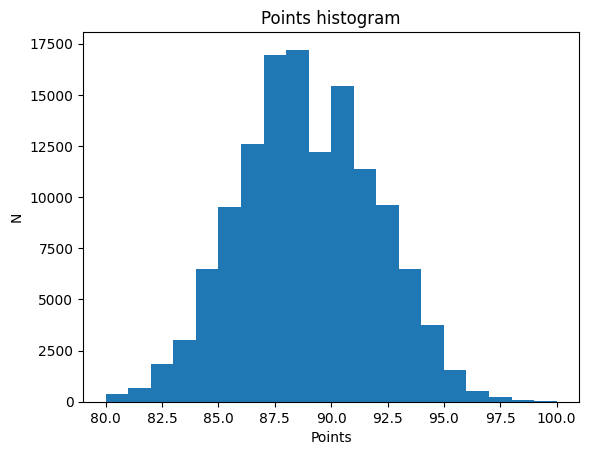

In [93]:
plt.hist(df_wine.points, bins=20)
plt.title("Points histogram")
plt.xlabel("Points")
plt.ylabel("N")
plt.show()

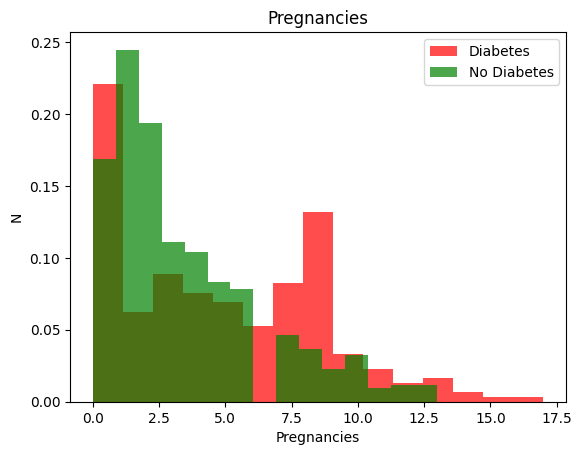

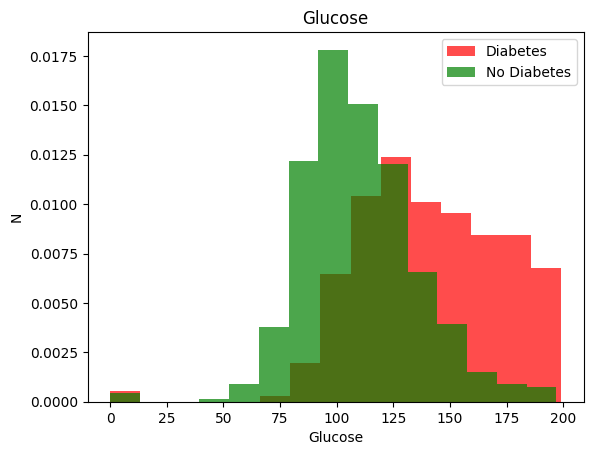

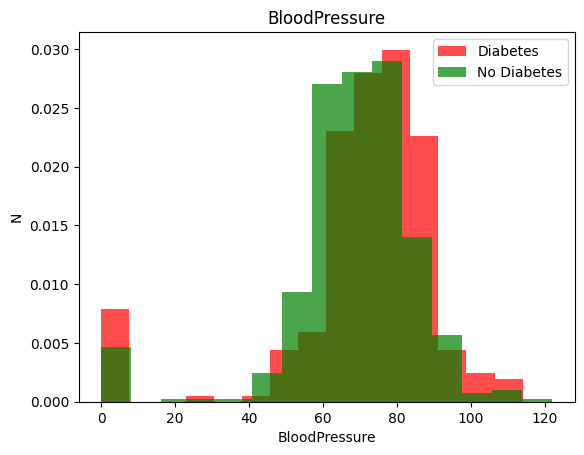

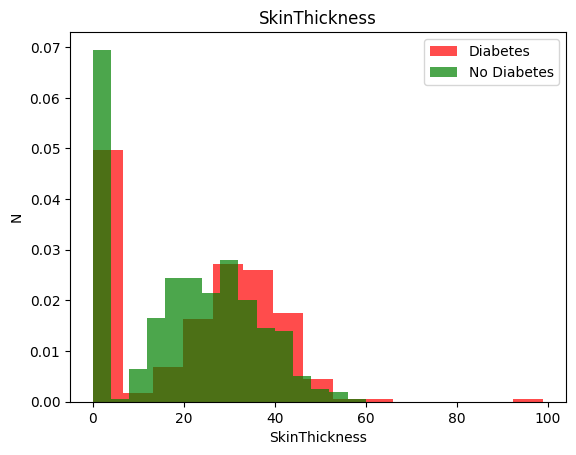

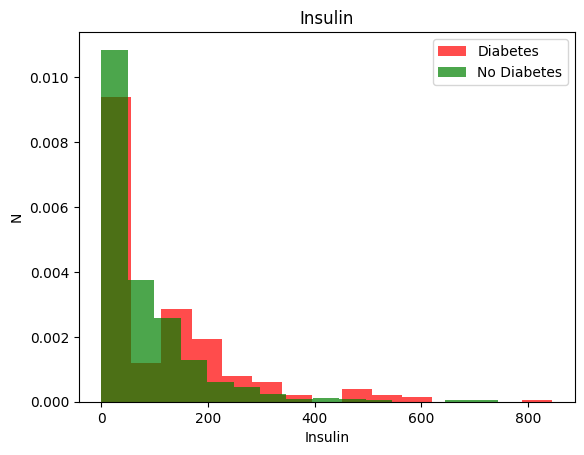

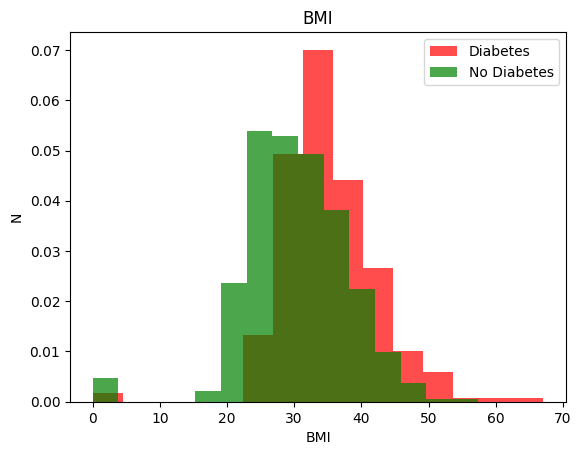

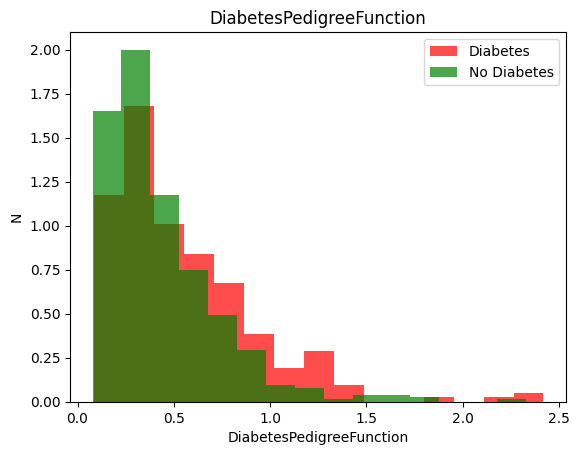

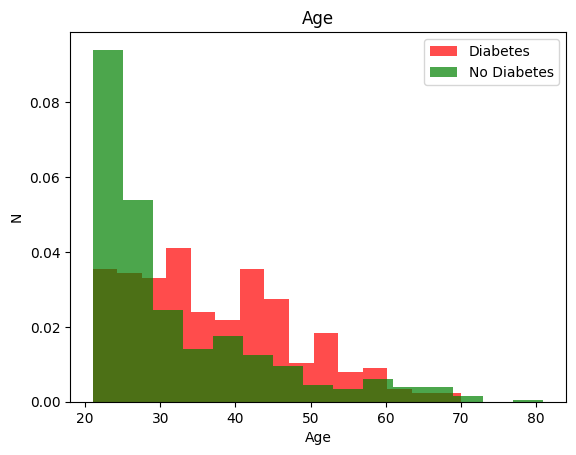

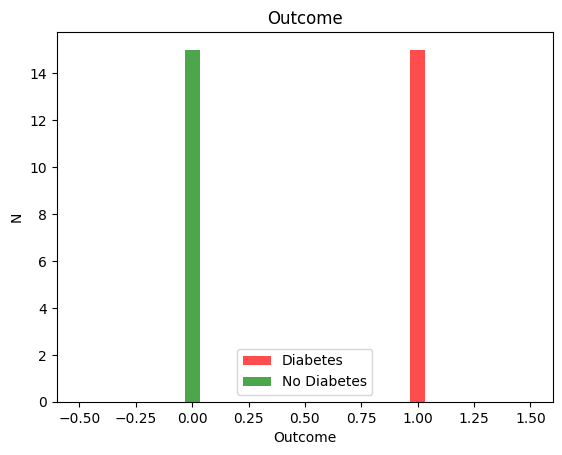

IndexError: index 9 is out of bounds for axis 0 with size 9

In [94]:
for i in range(len(df_diabetes[:-1])):
    label = df_diabetes.columns[i]
    plt.hist(df_diabetes[df_diabetes['Outcome']==1][label], color='red', label='Diabetes', alpha=0.7, density=True, bins=15)
    plt.hist(df_diabetes[df_diabetes['Outcome']==0][label], color='green', label='No Diabetes', alpha=0.7, density=True, bins=15)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('N')
    plt.legend()
    plt.show()

In [ ]:
X = df_diabetes[df_diabetes.columns[:-1]].values
y = df_diabetes[df_diabetes.columns[-1]].values

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df_diabetes.columns)

In [ ]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

(268, 500)

In [ ]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df_diabetes.columns)


In [ ]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adagrad(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 0s 999us/step - loss: 0.7495 - accuracy: 0.3883


[0.7494762539863586, 0.3883333206176758]

In [ ]:
model.evaluate(X_valid, y_valid)

16/16 [==============================] - 0s 604us/step - loss: 0.7478 - accuracy: 0.4020


[0.7477594017982483, 0.4020000100135803]

In [95]:
model.fit(X_train, y_train, batch_size=16, epochs=32, validation_data=(X_valid, y_valid))

Epoch 1/32
38/38 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.6583 - val_loss: 0.6464 - val_accuracy: 0.6680
Epoch 2/32
38/38 [==============================] - 0s 1ms/step - loss: 0.6470 - accuracy: 0.6583 - val_loss: 0.6451 - val_accuracy: 0.6680
Epoch 3/32
38/38 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.6600 - val_loss: 0.6438 - val_accuracy: 0.6760
Epoch 4/32
38/38 [==============================] - 0s 1ms/step - loss: 0.6444 - accuracy: 0.6667 - val_loss: 0.6425 - val_accuracy: 0.6740
Epoch 5/32
38/38 [==============================] - 0s 1ms/step - loss: 0.6431 - accuracy: 0.6667 - val_loss: 0.6413 - val_accuracy: 0.6760
Epoch 6/32
38/38 [==============================] - 0s 2ms/step - loss: 0.6418 - accuracy: 0.6667 - val_loss: 0.6401 - val_accuracy: 0.6780
Epoch 7/32
38/38 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.6683 - val_loss: 0.6389 - val_accuracy: 0.6800
Epoch 8/32
38/38 [==

In [96]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 733us/step - loss: 0.6376 - accuracy: 0.6360


[0.6375736594200134, 0.6359999775886536]